### Image Pyramid

An image pyramid is a multi-scale representation of an image, where the image is repeatedly scaled down (reduced in size) or scaled up (expanded) across multiple levels, forming a pyramid-like structure. Each level in the pyramid contains a version of the image at a different resolution. They help in tasks like object detection, image blending, and compression.

**Down-Sampling** : Reduce the image resolution by removing pixels and shrinking its size (e.g., by a factor of 2). Result; A smaller image with reduced detail.

**Up-Sampling** : Increase the image resolution by interpolating new pixels between existing ones. Result; A larger image, though less sharp than the original.

#### Reason to Use Image Pyramids

**Multi-Scale Analysis:** Objects in an image may appear at different scales. By analyzing images at multiple scales (pyramid levels), algorithms can detect objects or patterns regardless of their size.

**Efficient Computation:** Performing operations like filtering, edge detection, or matching on smaller images reduces computational cost. Operations at coarser scales require fewer pixels and are faster.

**Image Compression:** Pyramids provide a way to store images at multiple resolutions, which is useful in progressive image compression (e.g., JPEG).

#### Types of Image Pyramids

**Gaussian Pyramid** : Higher level (Low resolution) in a Gaussian Pyramid is formed by removing consecutive rows and columns in Lower level (higher resolution) image. Then each pixel in higher level is formed by the contribution from 5 pixels in underlying level with gaussian weights. We can use `cv.pyrDown()` to downscale the image. We can upscale the down scaled image by using `cv.pyrUp()`. At each level the image is down scaled by factor of 2. 

Gaussian Pyramid forms the basis for constructing the `Laplacian Pyramid`

Example: 

<img src='./Notes_Images/Pyramid2.png'>

<img src='./Notes_Images/Pyramid1.png'>

**Laplacian Pyramid** : The Laplacian Pyramid represents the difference between consecutive levels of a Gaussian Pyramid. It highlights the edges and details lost when the image is smoothed and down-sampled.


In [83]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

In [84]:
# Gaussian Pyramid

img = cv.imread('roi.jpg')
real_img = img.copy()
assert img is not None, "file could not be read, check with os.path.exists()"

(<Axes: title={'center': 'Laplacian Level3'}>,
 Text(0.5, 1.0, 'Laplacian Level3'),
 (np.float64(-0.5), np.float64(449.5), np.float64(279.5), np.float64(-0.5)))

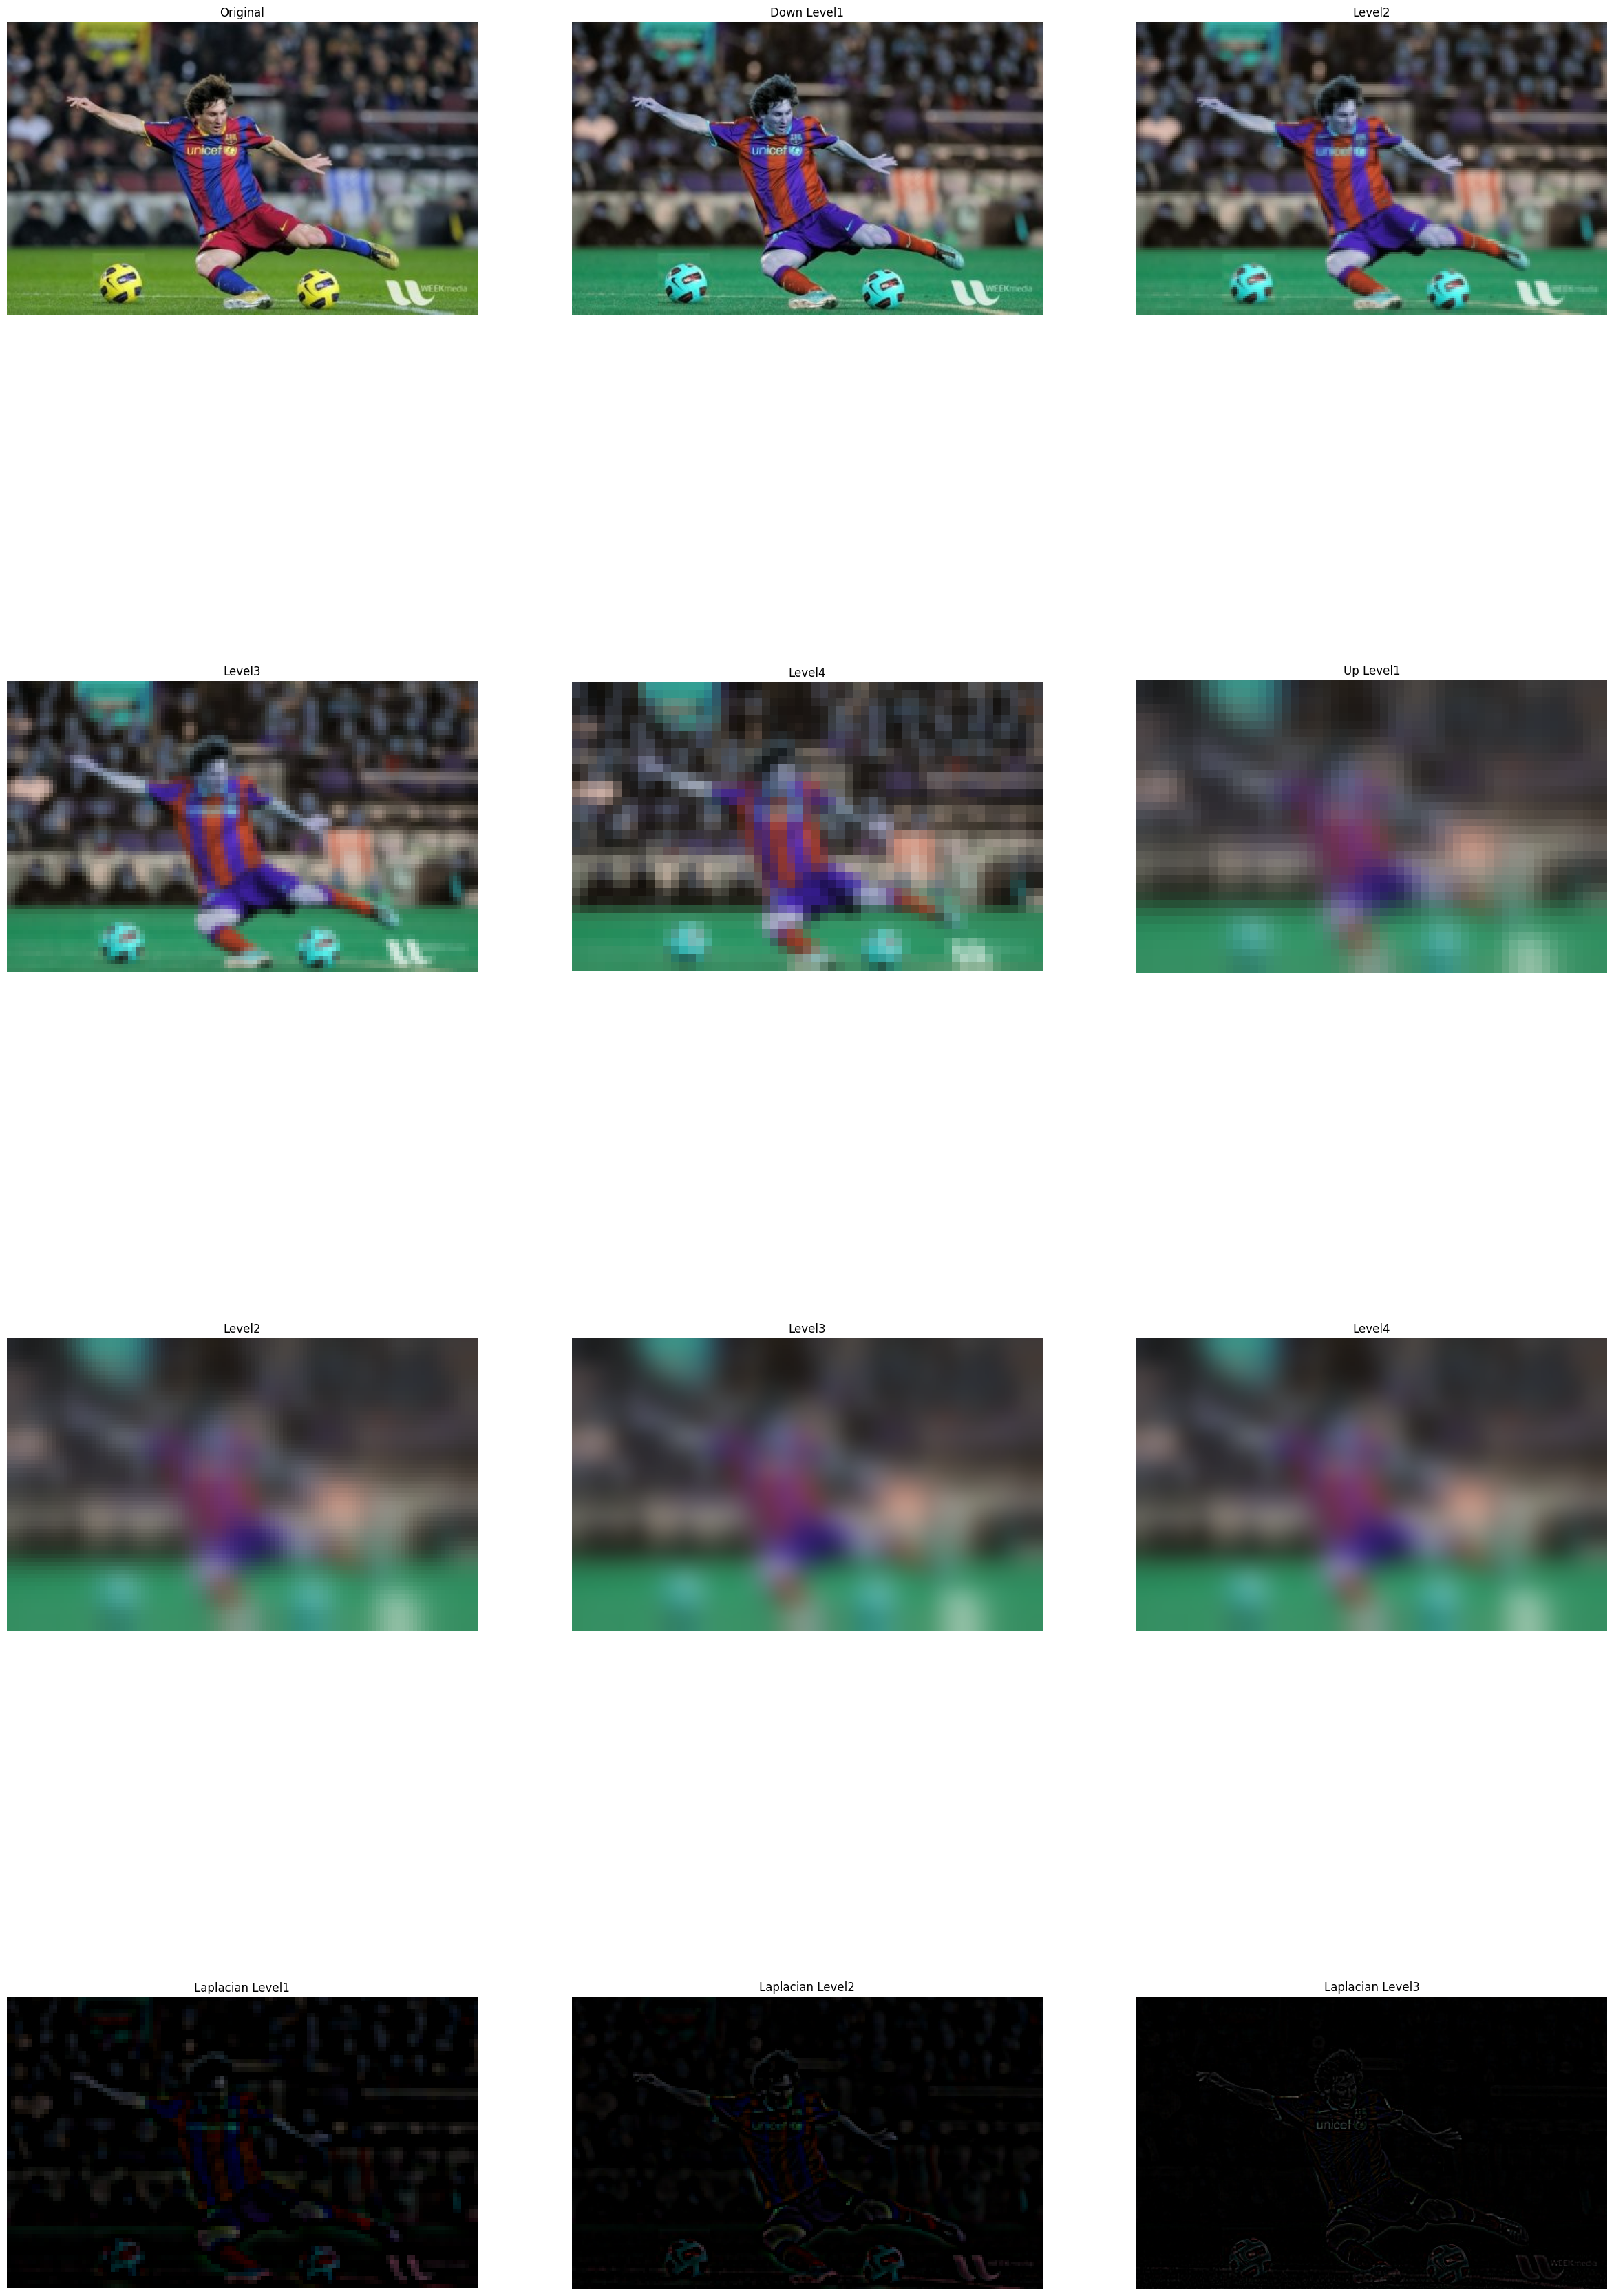

In [85]:
# Number of pyramid levels
num_levels = 4

plt.figure(figsize=(30,60))

# Build Gaussian Pyramid Down Scaling
pyramid_images_down = [img]  # List to store each level of the pyramid
for i in range(num_levels):
    img = cv.pyrDown(img)  # Reduce the image resolution, returns the down scaled image
    pyramid_images_down.append(img)
    cv.imshow(f"Down Level {i+1}", img)

# Build Gaussian Pyramid Up Scaling
pyramid_images_up = []  # List to store each level of the pyramid
for i in pyramid_images_down:
    img = cv.pyrUp(img)  # Increase the image resolution, returns the up scaled image, poor quality
    pyramid_images_up.append(img)
    cv.imshow(f"Up Level {i+1}", img)

laplacian_img = []
# Laplacian Pyramids
for item in range(3,0,-1):
    GE = cv.pyrUp(pyramid_images_down[item])  # Upscale the image
    GE = cv.resize(GE, (pyramid_images_down[item-1].shape[1], 
                        pyramid_images_down[item-1].shape[0]))  # Resize to match
    L = cv.subtract(pyramid_images_down[item-1],GE)
    laplacian_img.append(L)
    cv.imshow(f"Laplacian Level {i}", L)

cv.waitKey(0)
cv.destroyAllWindows()

plt.subplot(5,3,1), plt.title("Original"), plt.imshow(cv.cvtColor(real_img,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(5,3,2), plt.title("Down Level1"), plt.imshow(pyramid_images_down[0], cmap='gray'), plt.axis('off')
plt.subplot(5,3,3), plt.title("Level2"), plt.imshow(pyramid_images_down[1], cmap='gray'), plt.axis('off')
plt.subplot(5,3,4), plt.title("Level3"), plt.imshow(pyramid_images_down[2], cmap='gray'), plt.axis('off')
plt.subplot(5,3,5), plt.title("Level4"), plt.imshow(pyramid_images_down[3], cmap='gray'), plt.axis('off')
plt.subplot(5,3,6), plt.title("Up Level1"), plt.imshow(pyramid_images_up[0], cmap='gray'), plt.axis('off')
plt.subplot(5,3,7), plt.title("Level2"), plt.imshow(pyramid_images_up[1], cmap='gray'), plt.axis('off')
plt.subplot(5,3,8), plt.title("Level3"), plt.imshow(pyramid_images_up[2], cmap='gray'), plt.axis('off')
plt.subplot(5,3,9), plt.title("Level4"), plt.imshow(pyramid_images_up[2], cmap='gray'), plt.axis('off')
plt.subplot(5,3,10), plt.title("Laplacian Level1"), plt.imshow(laplacian_img[0], cmap='gray'), plt.axis('off')
plt.subplot(5,3,11), plt.title("Laplacian Level2"), plt.imshow(laplacian_img[1], cmap='gray'), plt.axis('off')
plt.subplot(5,3,12), plt.title("Laplacian Level3"), plt.imshow(laplacian_img[2], cmap='gray'), plt.axis('off')

### Contours

Contours are curves that connect all the continuous points in an image that have the same intensity or pixel value. In simple terms, contours represent the boundaries or edges of objects in an image.

Contours are an essential tool for object detection, shape analysis, and image segmentation.

Techniques like `Sobel`, `Scharr`, or `Canny` Edge Detection are often used before finding contours to emphasize edges.

**Best Practice for Contours**

1. Grey scale image
2. Reduce noise using `bilateralFilter` because it preserves the edges. It will make it easier for `Canny` to detect the edge. Other Smoothing techniques will affect the edges.
3. For better accuracy, use `binary` images. So before finding contours, apply `threshold` or `Canny` edge detection.
4. In OpenCV, finding `contours` is like finding white object from black background. So remember, object to be found should be white and background should be black.
5. Algorithms like `Suzuki’s` Algorithm (used in OpenCV's `cv.findContours`) trace the boundaries of connected components in the binary image.

<img src='./Notes_Images/Contour1.png'>

#### **Use of Contours**

Contours provide the exact boundaries of objects in an image, making them useful for detecting shapes.

By analyzing the contour of an object, we can calculate its area, perimeter, and other geometric properties.

Contours can be used to extract object features

#### **Contour Approximation Method**

This is the third argument in `cv.findContours` function. What does it denote actually? 

We know that `contours` are the boundaries of a shape with `same intensity`. It stores the `(x,y)` coordinates of the boundary of a shape. But does it store all the coordinates ? That is specified by this contour approximation method.

If you pass `cv.CHAIN_APPROX_NONE`, all the boundary points are stored. But actually do we need all the points? For eg, you found the contour of a straight line. Do you need all the points on the line to represent that line? No, we need just two end points of that line. This is what `cv.CHAIN_APPROX_SIMPLE` does. It removes all redundant points and compresses the contour, thereby saving memory.

Below image of a rectangle demonstrate this technique. Just draw a circle on all the coordinates in the contour array (drawn in blue color). First image shows points I got with `cv.CHAIN_APPROX_NONE` (734 points) and second image shows the one with `cv.CHAIN_APPROX_SIMPLE` (only 4 points). See, how much memory it saves!!!

<img src='./Notes_Images/Contour2.png'>

#### Contour Features

**1. Moments** :  Image Moments are statistical properties or scalar values that describe the shape and distribution of pixel intensities within an image. Moments help characterize objects in an image by calculating features like area, centroid, orientation, and more. 

It is used for Object Recognition, Object Tracking, and Shape Analysis.

<img src='./Notes_Images/Contour3.png'>

**Types of Image Moment**

<img src='./Notes_Images/Contour4.png'>

Moment for Area : *M<sub>00</sub>* represents the total number of foreground pixels (object area).

Moment for Centroid (Center of Mass or Geometric Centre) : *M<sub>10</sub>*, *M<sub>01</sub>* used to compute the centroid of the object.

<img src='./Notes_Images/Contour5.png'>

**Real World Examples of Moments**

<img src='./Notes_Images/Contour6.png'>

We can use `cv.moments(cnt)` to get the moments for specific `contour`. It will give us the moments i.e. *M<sub>00</sub>*, *M<sub>01</sub>*, *M<sub>10</sub>* for that contour.

**2. Contour Approximation**

It approximates a contour shape with less number of vertices. `Ramer-Douglas-Peucker (RDP) algorithm` is used for the approximation. It is useful when the extracted `contour` is too detailed or noisy. 

We can use `cv.approxPolyDP(curve, epsilon, closed)`.  In this, second argument is called `epsilon`, which is maximum distance from contour to approximated contour. It is an accuracy parameter. A wise selection of epsilon is needed to get the correct output. Also, `closed` is Boolean indicating whether the contour is closed.

*Real-World Example*

Imagine you are detecting a hand's outline for gesture recognition. A detailed contour of the hand may include every small ridge and indentation, but for gesture recognition, you only need the essential features (e.g., finger tips and valleys).

(<Axes: title={'center': 'Canny'}>,
 Text(0.5, 1.0, 'Canny'),
 (np.float64(-0.5), np.float64(611.5), np.float64(483.5), np.float64(-0.5)))

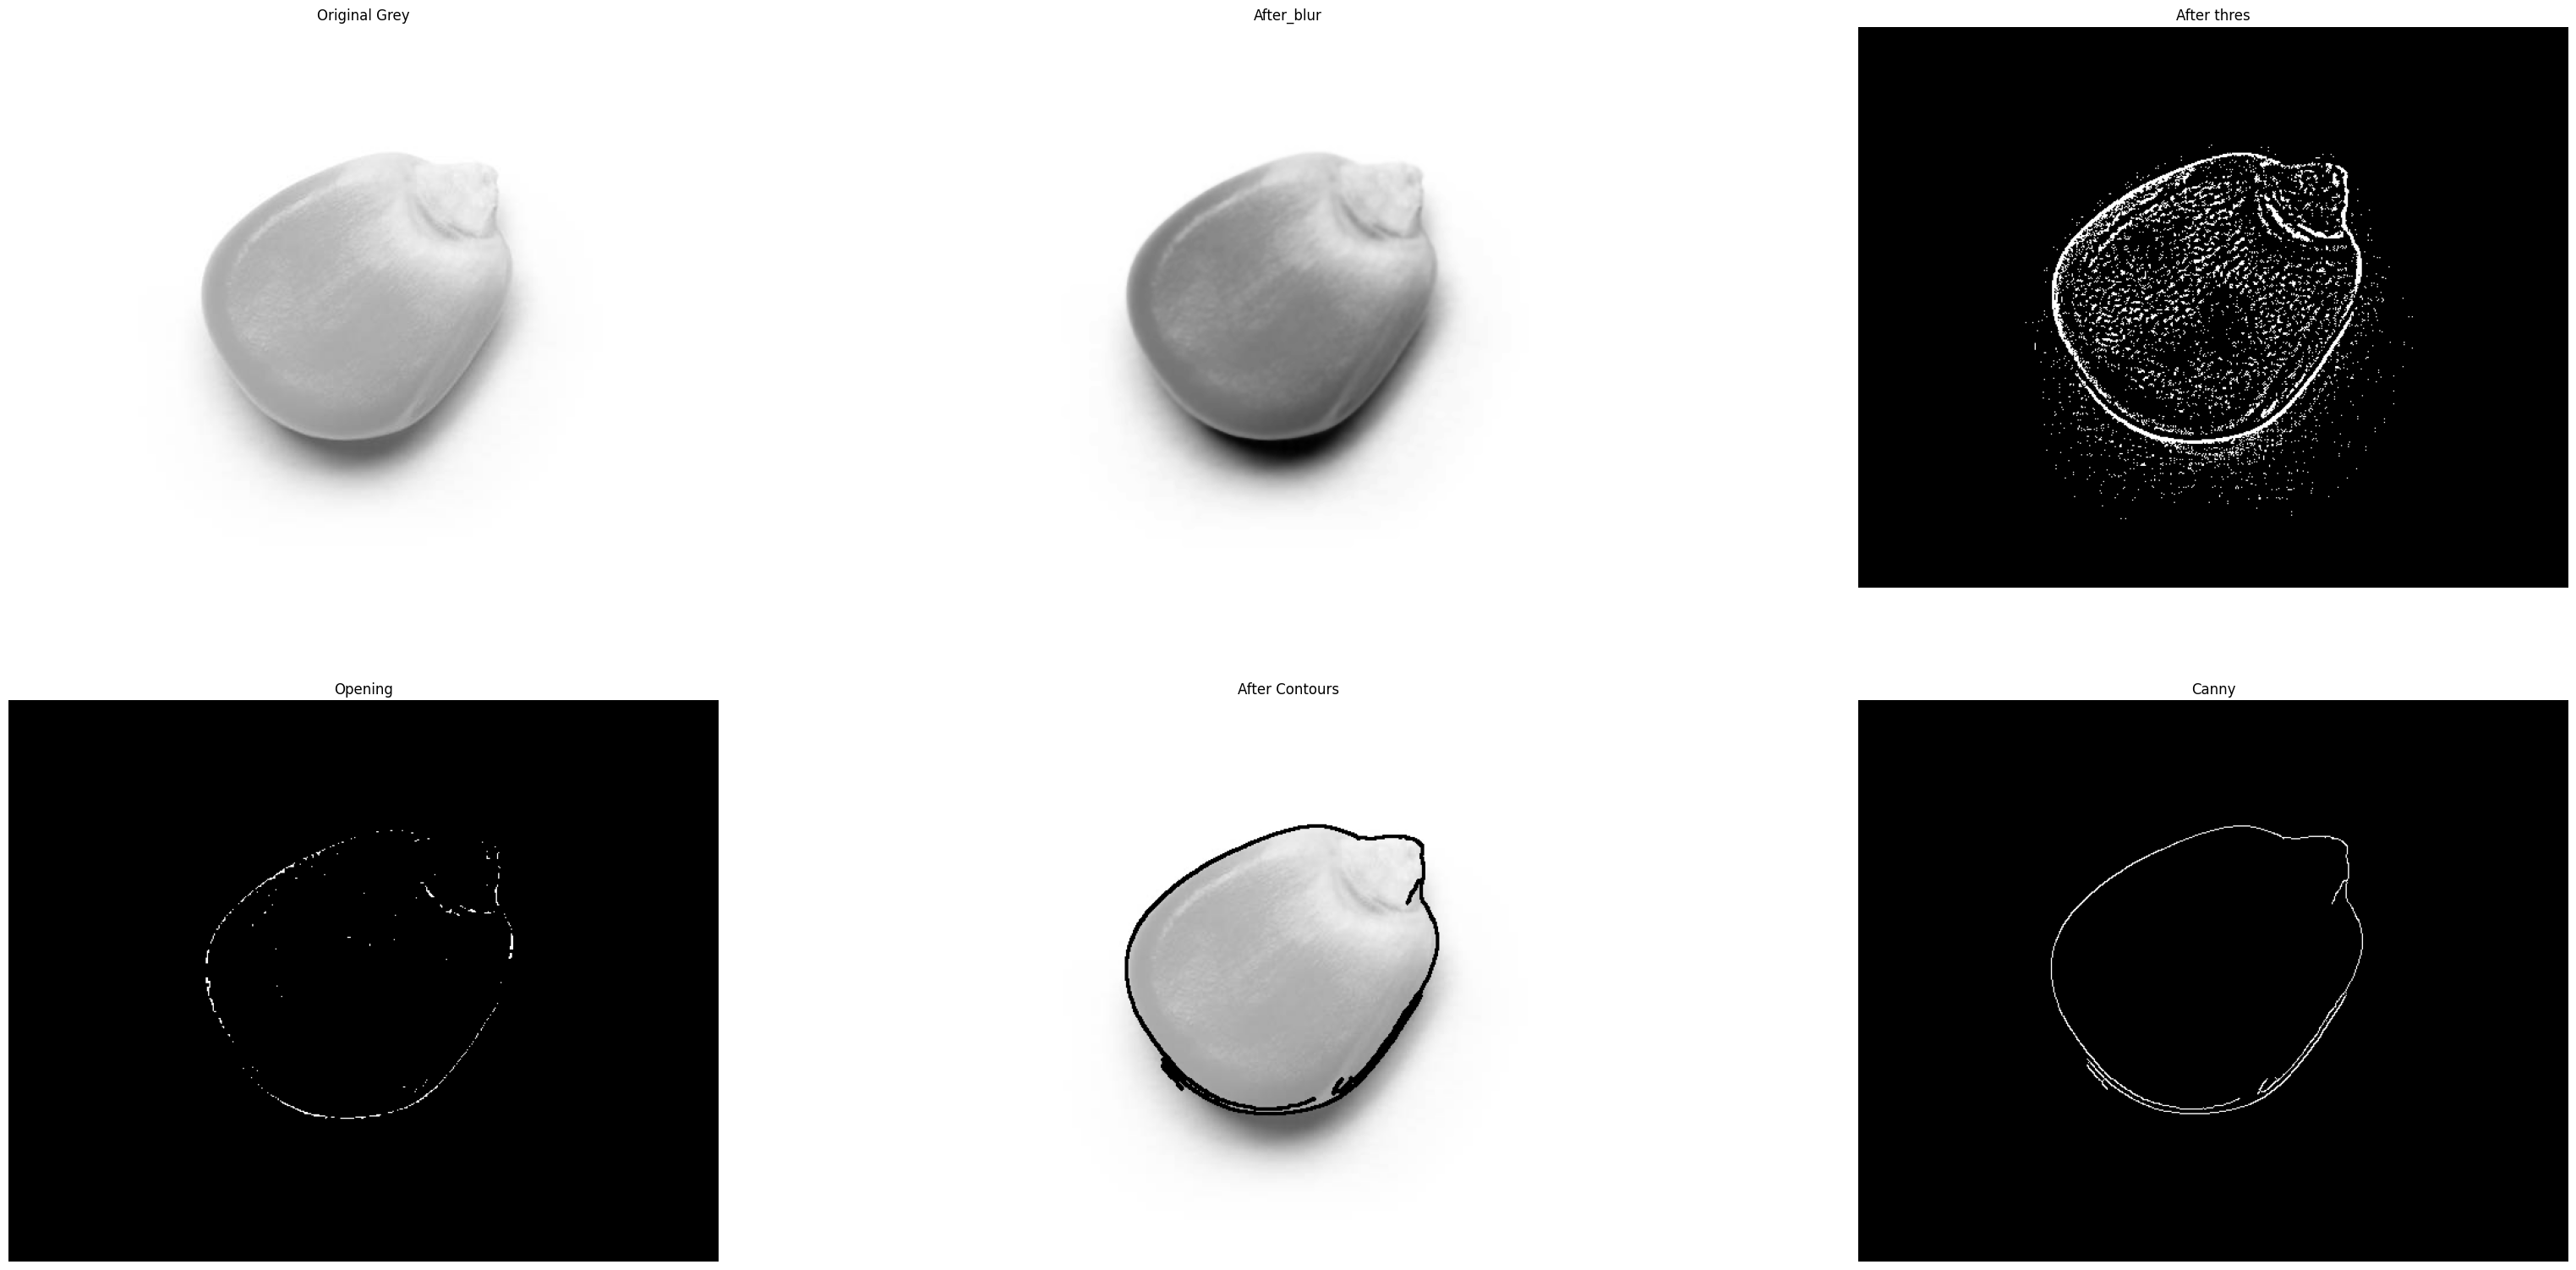

In [86]:
# Read Best Practices for Contours Before Running
# Find Contour

test_img = cv.imread('./Maize_img/m1.jpg', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(40,50))

# Smoothing
after_blur = cv.bilateralFilter(test_img,5,25,25)

after_thres = cv.adaptiveThreshold(after_blur,255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 5, 1)

# Edge Detection
canny = cv.Canny(after_blur, 10, 210) # Pass Grey Image

# Set kernel
kernel = np.ones((2,2),np.uint8) 

opening = cv.morphologyEx(after_thres,cv.MORPH_OPEN, kernel) # Optional for small noise

opening = cv.erode(opening,kernel,iterations=2) # Option for small noise, here performs 2 openings 

# Find contours from canny
contours, hierarchy = cv.findContours(canny, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) # Retrieval mode : RETR_TREE, Approximation method : CHAIN_APPROX_SIMPLE

# Draw Contours on the Original Image
img_countours = cv.cvtColor(test_img, cv.COLOR_GRAY2BGR) # Grey to BGR
cv.drawContours(img_countours, contours, -1, (0,0,0), 2) # -1 is to draw for all contours, index of the contour

plt.subplot(5,3,1), plt.title("Original Grey"), plt.imshow(cv.cvtColor(test_img,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(5,3,2), plt.title("After_blur"), plt.imshow(after_blur, cmap='gray'), plt.axis('off')
plt.subplot(5,3,3), plt.title("After thres"), plt.imshow(after_thres, cmap='gray'), plt.axis('off')
plt.subplot(5,3,4), plt.title("Opening"), plt.imshow(opening, cmap='gray'), plt.axis('off')
plt.subplot(5,3,5), plt.title("After Contours"), plt.imshow(img_countours, cmap='gray'), plt.axis('off')
plt.subplot(5,3,6), plt.title("Canny"), plt.imshow(canny, cmap='gray'), plt.axis('off')

In [87]:
# Contour Moments

M = cv.moments(contours[1]) # Moment for contour at 1 index
print(M)

area = cv.contourArea(contours[1]) # Area for contour at 1 index
print(area)

perimeter = cv.arcLength(contours[1],True)
print(perimeter)

{'m00': 184.5, 'm10': 49474.83333333333, 'm01': 43102.166666666664, 'm20': 14682700.75, 'm11': 11544202.708333332, 'm02': 11256553.416666666, 'm30': 4780140802.45, 'm21': 3408358792.95, 'm12': 3026040089.8166666, 'm03': 3183984501.8500004, 'mu20': 1415713.577311052, 'mu11': -13913.88862541318, 'mu02': 1187194.2222975008, 'mu30': 83617447.11199856, 'mu21': -14293999.471517205, 'mu12': 14025636.134720266, 'mu03': -422695.5903458595, 'nu20': 41.58940011636378, 'nu11': -0.40874813273736765, 'nu02': 34.87618987221013, 'nu30': 180.84478014626353, 'nu21': -30.91454332939574, 'nu12': 30.33413684344604, 'nu03': -0.9141906832255235}
184.5
1771.9667220115662


In [88]:
# Contour Approximation

# Epsilon: 2% of the arc length
small_epsilon = 0.001*cv.arcLength(contours[1],True) # Retain detailed borders, including minor bays and inlets.
large_epsilon = 0.1*cv.arcLength(contours[1],True) # Ignore small details and represent the country as a rough polygon.

# Approximate the contour
approx = cv.approxPolyDP(contours[1], small_epsilon, True)

# Draw original and approximated contours
cv.imshow("After Contour",img_countours)
cv.drawContours(test_img, [approx], -1, (0, 0, 0), 2) # Contour after approximation
cv.imshow("Approx Contour",test_img) 
cv.waitKey(0)
cv.destroyAllWindows()